In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [0]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data (1).xlsx


## 1. CONSUMO Y ARREGLO DEL DATASET

In [0]:
Jugadores_DF = pd.read_excel(io.BytesIO(uploaded['data.xlsx']), encoding= 'unicode_escape')
Jugadores_DF.head()

,Cons,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,?110.5M,?565K,2202.0,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,?226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,?77M,?405K,2228.0,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,?127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,?118.5M,?290K,2143.0,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,?228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,?72M,?260K,1471.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,?138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,?102M,?355K,2281.0,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,?196.4M


### 1.1 Selección de Variables a usar en el Modelo

In [0]:
VarNum = ['Overall', 'Crossing','Finishing',  'ShortPassing',  'Dribbling','LongPassing', 'BallControl', 'Acceleration','SprintSpeed', 'Agility',  
           'Stamina','Volleys','FKAccuracy','Reactions','Balance','ShotPower','Strength','LongShots','Aggression','Interceptions','HeadingAccuracy','Curve',
           'Jumping','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle']

VarInfo = ['ID', 'Name','Nationality','Club','Position']

In [0]:
DFInfo = Jugadores_DF[VarInfo+VarNum]
DFHabil = Jugadores_DF[VarInfo+VarNum]
DFInfo = DFInfo.dropna()
DFInfo=DFInfo.reset_index(drop=True)
DFHabil = DFHabil.dropna()
DFHabil=DFHabil.reset_index(drop=True)

del DFHabil['ID']
del DFHabil['Name']
del DFHabil['Overall']
del DFHabil['Nationality']
del DFHabil['Club']
del DFHabil['Position']

del DFInfo['Crossing']
del DFInfo['Finishing']
del DFInfo['ShortPassing']
del DFInfo['Dribbling']
del DFInfo['LongPassing']
del DFInfo['BallControl']
del DFInfo['Acceleration']
del DFInfo['SprintSpeed']
del DFInfo['Agility']
del DFInfo['Stamina']
del DFInfo['Volleys']
del DFInfo['FKAccuracy']
del DFInfo['Reactions']
del DFInfo['Balance']
del DFInfo['ShotPower']
del DFInfo['Strength']
del DFInfo['LongShots']
del DFInfo['Aggression']
del DFInfo['Interceptions']
del DFInfo['HeadingAccuracy']
del DFInfo['Curve']
del DFInfo['Jumping']
del DFInfo['Positioning']
del DFInfo['Vision']
del DFInfo['Penalties']
del DFInfo['Composure']
del DFInfo['Marking']
del DFInfo['StandingTackle']
del DFInfo['SlidingTackle']


DFHabil

,Crossing,Finishing,ShortPassing,Dribbling,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Stamina,Volleys,FKAccuracy,Reactions,Balance,ShotPower,Strength,LongShots,Aggression,Interceptions,HeadingAccuracy,Curve,Jumping,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,84.0,95.0,90.0,97.0,87.0,96.0,91.0,86.0,91.0,72.0,86.0,94.0,95.0,95.0,85.0,59.0,94.0,48.0,22.0,70.0,93.0,68.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,84.0,94.0,81.0,88.0,77.0,94.0,89.0,91.0,87.0,88.0,87.0,76.0,96.0,70.0,95.0,79.0,93.0,63.0,29.0,89.0,81.0,95.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,79.0,87.0,84.0,96.0,78.0,95.0,94.0,90.0,96.0,81.0,84.0,87.0,94.0,84.0,80.0,49.0,82.0,56.0,36.0,62.0,88.0,61.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,17.0,13.0,50.0,18.0,51.0,42.0,57.0,58.0,60.0,43.0,13.0,19.0,90.0,43.0,31.0,64.0,12.0,38.0,30.0,21.0,21.0,67.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,93.0,82.0,92.0,86.0,91.0,91.0,78.0,76.0,79.0,90.0,82.0,83.0,91.0,77.0,91.0,75.0,91.0,76.0,61.0,55.0,85.0,63.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17885,34.0,38.0,49.0,42.0,45.0,43.0,54.0,57.0,60.0,40.0,25.0,34.0,49.0,76.0,43.0,47.0,38.0,46.0,46.0,40.0,30.0,55.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0
17886,23.0,52.0,43.0,39.0,25.0,40.0,41.0,39.0,38.0,43.0,36.0,20.0,40.0,52.0,41.0,67.0,42.0,47.0,16.0,52.0,32.0,47.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0
17887,25.0,40.0,38.0,45.0,28.0,44.0,70.0,69.0,50.0,55.0,38.0,27.0,47.0,58.0,45.0,32.0,45.0,32.0,15.0,46.0,38.0,60.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0
17888,44.0,50.0,42.0,51.0,32.0,52.0,61.0,60.0,52.0,40.0,40.0,32.0,21.0,71.0,64.0,48.0,34.0,33.0,22.0,39.0,34.0,42.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0


### 1.2 Etiqueta Booleana para Atacantes (ATK), Volantes (VOL), Defensas (DEF) y Arquero (GK)

In [0]:
for i in ["ST","RW","CF","LW","RS","LS","LF","RF"]:
  DFInfo.loc[DFInfo.Position == i , 'PositionATK'] = 1
for i in ["RCM","LCM","RDM","LDM","LM","RM","CAM","CM","CDM","RAM","LAM"]:
  DFInfo.loc[DFInfo.Position == i , 'PositionATK'] = 0
for i in ["CB","RCB","LCB","LWB","RB","LB","RWB"]:
  DFInfo.loc[DFInfo.Position == i , 'PositionATK'] = 0
for i in ["GK"]:
  DFInfo.loc[DFInfo.Position == i , 'PositionATK'] = 0

for i in ["ST","RW","CF","LW","RS","LS","LF","RF"]:
  DFInfo.loc[DFInfo.Position == i , 'PositionDEF'] = 0
for i in ["RCM","LCM","RDM","LDM","LM","RM","CAM","CM","CDM","RAM","LAM"]:
  DFInfo.loc[DFInfo.Position == i , 'PositionDEF'] = 0
for i in ["CB","RCB","LCB","LWB","RB","LB","RWB"]:
  DFInfo.loc[DFInfo.Position == i , 'PositionDEF'] = 1
for i in ["GK"]:
  DFInfo.loc[DFInfo.Position == i , 'PositionDEF'] = 0


for i in ["ST","RW","CF","LW","RS","LS","LF","RF"]:
  DFInfo.loc[DFInfo.Position == i , 'PositionVOL'] = 0
for i in ["RCM","LCM","RDM","LDM","LM","RM","CAM","CM","CDM","RAM","LAM"]:
  DFInfo.loc[DFInfo.Position == i , 'PositionVOL'] = 1
for i in ["CB","RCB","LCB","LWB","RB","LB","RWB"]:
  DFInfo.loc[DFInfo.Position == i , 'PositionVOL'] = 0
for i in ["GK"]:
  DFInfo.loc[DFInfo.Position == i , 'PositionVOL'] = 0

for i in ["ST","RW","CF","LW","RS","LS","LF","RF"]:
  DFInfo.loc[DFInfo.Position == i , 'PositionGK'] = 0
for i in ["RCM","LCM","RDM","LDM","LM","RM","CAM","CM","CDM","RAM","LAM"]:
  DFInfo.loc[DFInfo.Position == i , 'PositionGK'] = 0
for i in ["CB","RCB","LCB","LWB","RB","LB","RWB"]:
  DFInfo.loc[DFInfo.Position == i , 'PositionGK'] = 0
for i in ["GK"]:
  DFInfo.loc[DFInfo.Position == i , 'PositionGK'] = 1

In [0]:
DFInfo

,ID,Name,Nationality,Club,Position,Overall,PositionATK,PositionDEF,PositionVOL,PositionGK
0,158023,L. Messi,Argentina,FC Barcelona,RF,94,1.0,0.0,0.0,0.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,ST,94,1.0,0.0,0.0,0.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,LW,92,1.0,0.0,0.0,0.0
3,193080,De Gea,Spain,Manchester United,GK,91,0.0,0.0,0.0,1.0
4,192985,K. De Bruyne,Belgium,Manchester City,RCM,91,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
17885,238813,J. Lundstram,England,Crewe Alexandra,CM,47,0.0,0.0,1.0,0.0
17886,243165,N. Christoffersson,Sweden,Trelleborgs FF,ST,47,1.0,0.0,0.0,0.0
17887,241638,B. Worman,England,Cambridge United,ST,47,1.0,0.0,0.0,0.0
17888,246268,D. Walker-Rice,England,Tranmere Rovers,RW,47,1.0,0.0,0.0,0.0


### 1.3 Normalización de las variables cuantitativas

In [0]:
DFhabilNormal = DFHabil.transform(lambda x: (x - x.mean()) / x.std()) 
DFhabilNormal.head()
# SE NORMALIZAN LAS VARIABLES DE MODO QUE LOS CLUSTER NO SE BASEN EN CUANTO A SI EL JUGADOR TIENE UN DESEMPEÑO ALTO, SINO QUE SE BASE EN EL TIPO DE JUGADOR QUE ES.

,Crossing,Finishing,ShortPassing,Dribbling,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Stamina,Volleys,FKAccuracy,Reactions,Balance,ShotPower,Strength,LongShots,Aggression,Interceptions,HeadingAccuracy,Curve,Jumping,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,1.865397,2.532375,2.131029,2.199433,2.238039,2.255326,1.766085,1.450544,1.861346,0.553296,2.433962,2.923756,3.676597,2.194557,1.713908,-0.504814,2.434600,-0.454129,-1.193000,1.018963,2.488980,0.243818,2.253950,2.871824,1.684905,3.269883,-0.717231,-0.908968,-0.923089
1,1.865397,2.481119,1.517879,1.723379,1.584975,2.135286,1.632282,1.791409,1.590419,1.559888,2.490493,1.894114,3.787418,0.427235,2.294917,1.089440,2.382643,0.410024,-0.854757,2.112904,1.836477,2.524800,2.305182,2.021845,2.322086,3.182299,-0.968739,-0.770429,-1.064078
2,1.593013,2.122329,1.722262,2.146538,1.650281,2.195306,1.966790,1.723236,2.200005,1.119504,2.320900,2.523340,3.565775,1.416936,1.423404,-1.301941,1.811108,0.006753,-0.516513,0.558357,2.217103,-0.347547,1.997791,2.376003,2.067213,3.094715,-1.019041,-1.093687,-0.594115
3,-1.784556,-1.670591,-0.594083,-1.979262,-0.112992,-0.985749,-0.508563,-0.458298,-0.238341,-1.271154,-1.692792,-1.366420,3.122487,-1.481472,-1.423540,-0.106251,-1.825931,-1.030231,-0.806436,-1.802252,-1.426039,0.159338,-1.947052,1.030202,-0.545225,0.817536,-1.622661,-1.232226,-1.534040
4,2.355689,1.866051,2.267285,1.617590,2.499265,1.955226,0.896367,0.768815,1.048564,1.685713,2.207839,2.294530,3.233309,0.922086,2.062513,0.770589,2.278727,1.158957,0.691499,0.155326,2.053978,-0.178586,1.895328,2.871824,1.939777,2.569212,1.043328,0.476422,0.251817


In [0]:
len(DFhabilNormal)

17890

In [0]:
len(DFInfo)

17890

## 2. CALCULO DE CORRELACIÓN POR POSICIÓN (ATK, VOL, DEF Y GK)

2.1 FUNCIÓN DE CORRELACIÓN

In [0]:
def cor_selector2(X2, y2,Numero_Caract2):
    cor_list2 = []
    Nombre_Caract2 = X2.columns.tolist()
    # CALCULAR LA CORRRELACIÓN DE "Y" PARA CADA CARACTERISTICA
    for i in X2.columns.tolist(): 
        cor2 = np.corrcoef(X2[i], y2)[0, 1] # CORR DE PEARSON DE LA VARIABLE IND "X" CON LA VARIABLE DEPEND "Y". [0,1] ES PARA QUE LA RTA SEA EN VALOR Y NO EN MATRIZ.
        cor_list2.append(cor2) #ALMACENA LOS RESULTADOS DE CADA CORRELACIÓN EN UNA LISTA
    
    cor_list2 = [0 if np.isnan(i) else i for i in cor_list2] #SI ALGÚN ELEMENTO DE LA LISTA DA "NAN" ENTONCES LO REEMPLAZA CON CERO. 
    cor_Caract_list2 = X2.iloc[:,np.argsort(np.abs(cor_list2))[-Numero_Caract2:]].columns.tolist() #IPAD
    # EVIDENCIAR SI LA CARACTERISTICA QUEDA EN EL TOP - DE ACUERDO CON LA CANTIDAD DE CARACTERISTICAS ELEGIDAS PARA EL MODELO "numero_Caract2"
    cor_Bool2 = [True if i in cor_Caract_list2 else False for i in Nombre_Caract2]
    cor_list2.sort()
    cor_list2=cor_list2[len(cor_list2)-Numero_Caract2:len(cor_list2)]
    #cor_list2.reverse()
    return cor_Bool2, cor_Caract_list2, cor_list2
#cor_Bool2, cor_Caract_list2, cor_list2 = cor_selector2(x, y,Numero_Caract2)
#print(str(len(cor_Caract_list2)), 'selected features')

### 2.2 CORRELACIÓN ATK

In [0]:
y = DFInfo['PositionATK']
x = DFHabil
Numero_Caract2=29 
cor_Bool2, cor_Caract_list2, cor_list2 = cor_selector2(x, y,Numero_Caract2)
print(str(len(cor_Caract_list2)), 'selected features')
TopDF=pd.DataFrame(cor_Caract_list2,cor_list2)
TopDF

29 selected features


,0
-0.464428,Reactions
-0.446961,Crossing
-0.435081,ShortPassing
-0.391620,Stamina
-0.150023,Strength
-0.117881,Jumping
0.018134,Composure
0.025478,Balance
0.033993,FKAccuracy
0.036407,Aggression


### 2.3 CORRELACIÓN GK

In [0]:
y = DFInfo['PositionGK']
x = DFHabil
Numero_Caract2=29 
cor_Bool2, cor_Caract_list2, cor_list2 = cor_selector2(x, y,Numero_Caract2)
print(str(len(cor_Caract_list2)), 'selected features')
TopDF=pd.DataFrame(cor_Caract_list2,cor_list2)
TopDF

29 selected features


,0
-0.816615,Reactions
-0.778208,Strength
-0.772626,Jumping
-0.757647,Vision
-0.729165,Composure
-0.702528,Interceptions
-0.684160,Balance
-0.677231,SlidingTackle
-0.644048,StandingTackle
-0.634229,Agility


### 2.4 CORRELACIÓN DEF

In [0]:
y = DFInfo['PositionDEF']
x = DFHabil
Numero_Caract2=29 
cor_Bool2, cor_Caract_list2, cor_list2 = cor_selector2(x, y,Numero_Caract2)
print(str(len(cor_Caract_list2)), 'selected features')
TopDF=pd.DataFrame(cor_Caract_list2,cor_list2)
TopDF

29 selected features


,0
-0.371471,Composure
-0.353547,Reactions
-0.284456,SprintSpeed
-0.269436,Acceleration
-0.224637,ShortPassing
-0.215304,BallControl
-0.162715,LongPassing
-0.156726,Crossing
-0.153194,Dribbling
-0.140657,Balance


### 2.5 CORRELACIÓN VOL

In [0]:
y = DFInfo['PositionVOL']
x = DFHabil
Numero_Caract2=29 
cor_Bool2, cor_Caract_list2, cor_list2 = cor_selector2(x, y,Numero_Caract2)
print(str(len(cor_Caract_list2)), 'selected features')
TopDF=pd.DataFrame(cor_Caract_list2,cor_list2)
TopDF

29 selected features


,0
-0.225668,HeadingAccuracy
-0.121047,Reactions
-0.008264,SlidingTackle
0.076762,Aggression
0.109667,Jumping
0.117352,Marking
0.129453,Interceptions
0.129674,StandingTackle
0.131782,SprintSpeed
0.202984,Composure


### 2.6 SELECCIÓN DEL TOP 3 DE LAS VARIABLES CON MAYOR CORRELACIÓN POR POSICIÓN.

In [0]:
VarCor = ['Finishing','Reactions','Crossing','Strength','Jumping','StandingTackle','SlidingTackle','Marking','Vision','LongPassing','FKAccuracy','Dribbling']
DFhabilNormal_Corr = DFhabilNormal[VarCor]
DFhabilNormal_Corr

,Finishing,Reactions,Crossing,Strength,Jumping,StandingTackle,SlidingTackle,Marking,Vision,LongPassing,FKAccuracy,Dribbling
0,2.532375,3.676597,1.865397,-0.504814,0.243818,-0.908968,-0.923089,-0.717231,2.871824,2.238039,2.923756,2.199433
1,2.481119,3.787418,1.865397,1.089440,2.524800,-0.770429,-1.064078,-0.968739,2.021845,1.584975,1.894114,1.723379
2,2.122329,3.565775,1.593013,-1.301941,-0.347547,-1.093687,-0.594115,-1.019041,2.376003,1.650281,2.523340,2.146538
3,-1.670591,3.122487,-1.784556,-0.106251,0.159338,-1.232226,-1.534040,-1.622661,1.030202,-0.112992,-1.366420,-1.979262
4,1.866051,3.233309,2.355689,0.770589,-0.178586,0.476422,0.251817,1.043328,2.871824,2.499265,2.294530,1.617590
...,...,...,...,...,...,...,...,...,...,...,...,...
17885,-0.389199,-1.421208,-0.858448,-1.461367,-0.854432,0.014626,0.063832,-0.365119,-0.103104,-0.504831,-0.508385,-0.709785
17886,0.328380,-2.418605,-1.457694,0.132887,-1.530278,-1.509304,-1.252063,-1.270549,-1.448904,-1.810959,-1.309218,-0.868469
17887,-0.286688,-1.642852,-1.348741,-2.657057,-0.432028,-1.601663,-1.628033,-0.767532,-0.740588,-1.615040,-0.908801,-0.551100
17888,0.225869,-4.524219,-0.313679,-1.381654,-1.952682,-1.047507,-0.876093,-1.371152,-0.457262,-1.353814,-0.622789,-0.233731


## 3. EJECUCIÓN K-MEANS

In [0]:
train = np.array(DFhabilNormal_Corr)

In [0]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters = i) for i in Nc]
score = [kmeans[i].fit(train).score(train) for i in range(len(kmeans))]

### 3.1 TÉCNICA DEL CODO PARA SELECCIÓN DE VARIABLES

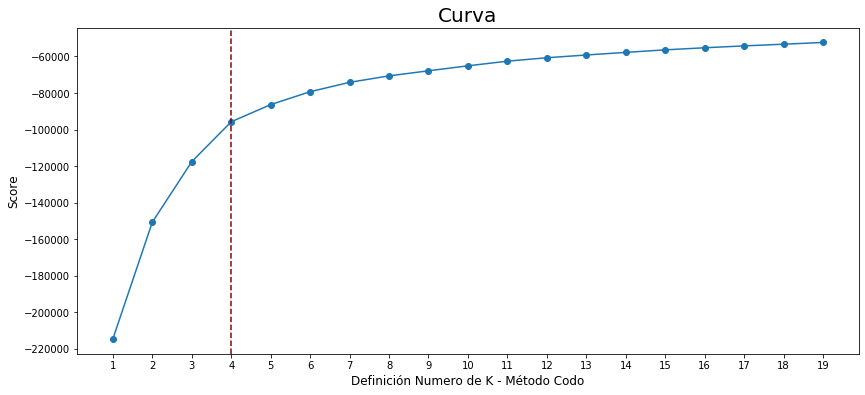

In [0]:
# Plot the results
fig, ax0 = plt.subplots(figsize = (14, 6))
plt.plot(Nc, score, marker='o')
plt.axvline(x = 4, color = "#8b0000", linestyle = "--")
plt.xticks(np.arange(1, 20, 1))
plt.xlabel("Definición Numero de K - Método Codo", fontsize = 12)
plt.ylabel("Score", fontsize = 12)
plt.title("Curva", fontsize = 20)
plt.show()


### 3.2 DEFINICIÓN DE CLUSTERS Y CENTROIDES

In [0]:
k_clusters = 4
kmeans = KMeans(n_clusters = k_clusters, algorithm = "elkan", random_state = 0)
kmeans = kmeans.fit(train)
clusters = kmeans.predict(train)
centroids = kmeans.cluster_centers_

In [0]:
DFCentroides=pd.DataFrame(centroids)													                                                                                                                                                                  										
DFCentroides.columns = ['Finishing','Reactions','Crossing','Strength','Jumping','StandingTackle','SlidingTackle','Marking','Vision','LongPassing','FKAccuracy','Dribbling']
DFCentroides

,Finishing,Reactions,Crossing,Strength,Jumping,StandingTackle,SlidingTackle,Marking,Vision,LongPassing,FKAccuracy,Dribbling
0,0.471366,0.714609,0.791719,0.178575,0.209520,0.732259,0.702498,0.713324,0.842773,0.906491,0.807898,0.647985
1,-1.694477,-0.345714,-1.927115,-0.372131,-0.620150,-1.547989,-1.482752,-1.609954,-1.157634,-1.758390,-1.619984,-2.179921
2,-0.724867,-0.371553,-0.269984,0.378301,0.224509,0.757996,0.775780,0.699409,-0.758552,-0.132772,-0.497052,-0.376617
3,0.816681,-0.233619,0.177424,-0.380682,-0.180854,-0.834407,-0.845359,-0.740223,0.288867,-0.120434,0.255040,0.506557


In [0]:
ListaDesvStd = [DFHabil.std()[1],DFHabil.std()[12],DFHabil.std()[0],DFHabil.std()[15],DFHabil.std()[21],DFHabil.std()[27],DFHabil.std()[28],DFHabil.std()[26],DFHabil.std()[23],DFHabil.std()[4],DFHabil.std()[11],DFHabil.std()[3]]
ListaMedia = [DFHabil.mean()[1],DFHabil.mean()[12],DFHabil.mean()[0],DFHabil.mean()[15],DFHabil.mean()[21],DFHabil.mean()[27],DFHabil.mean()[28],DFHabil.mean()[26],DFHabil.mean()[23],DFHabil.mean()[4],DFHabil.mean()[11],DFHabil.mean()[3]]

In [0]:
DFCentroidesConv=(DFCentroides*ListaDesvStd)+ListaMedia
DFCentroidesConv

,Finishing,Reactions,Crossing,Strength,Jumping,StandingTackle,SlidingTackle,Marking,Vision,LongPassing,FKAccuracy,Dribbling
0,54.789650,68.272524,64.291139,67.573157,67.594006,63.540022,60.589724,61.439501,65.353872,66.610759,57.010983,67.669211
1,12.533995,58.704715,14.383127,60.664516,57.773201,14.162283,14.091315,15.252605,37.112159,25.804963,14.567246,14.206452
2,31.451122,58.471554,44.802083,70.078726,67.771434,64.097356,62.149038,61.162861,42.746394,50.697115,34.198117,48.298678
3,61.526765,59.716204,53.014879,60.557249,62.973145,29.614589,27.653965,32.542914,57.533841,50.886046,47.346035,64.995464


In [0]:
DFCentroidesConv2 = DFCentroidesConv.T

In [0]:
DFCentroidesConv2.columns = ['C0','C1','C2','C3']

### 3.3 CLUSTER POR HABILIDADES DE MAYOR CORRELACIÓN

In [0]:
DFCentroidesConv2

,C0,C1,C2,C3
Finishing,54.789650,12.533995,31.451122,61.526765
Reactions,68.272524,58.704715,58.471554,59.716204
Crossing,64.291139,14.383127,44.802083,53.014879
Strength,67.573157,60.664516,70.078726,60.557249
Jumping,67.594006,57.773201,67.771434,62.973145
StandingTackle,63.540022,14.162283,64.097356,29.614589
SlidingTackle,60.589724,14.091315,62.149038,27.653965
Marking,61.439501,15.252605,61.162861,32.542914
Vision,65.353872,37.112159,42.746394,57.533841
LongPassing,66.610759,25.804963,50.697115,50.886046


In [0]:
DFCentroidesConv2=DFCentroidesConv2.reset_index(drop=True)
DFCentroidesConv2["Habilidad"] = ['Finishing','Reactions','Crossing','Strength','Jumping','StandingTackle','SlidingTackle','Marking','Vision','LongPassing','FKAccuracy','Dribbling']
DFCentroidesConv = pd.DataFrame({'C0' : DFCentroidesConv2["C1"],'C1' : DFCentroidesConv2["C0"],'C2' : DFCentroidesConv2["C2"],'C3' : DFCentroidesConv2["C3"],'Habilidad' : DFCentroidesConv2["Habilidad"]})
DFCentroidesConv

,C0,C1,C2,C3,Habilidad
0,12.533995,54.789650,31.451122,61.526765,Finishing
1,58.704715,68.272524,58.471554,59.716204,Reactions
2,14.383127,64.291139,44.802083,53.014879,Crossing
3,60.664516,67.573157,70.078726,60.557249,Strength
4,57.773201,67.594006,67.771434,62.973145,Jumping
5,14.162283,63.540022,64.097356,29.614589,StandingTackle
6,14.091315,60.589724,62.149038,27.653965,SlidingTackle
7,15.252605,61.439501,61.162861,32.542914,Marking
8,37.112159,65.353872,42.746394,57.533841,Vision
9,25.804963,66.610759,50.697115,50.886046,LongPassing


In [0]:
DFCentroidesConv.std()
DFDesvEst=pd.DataFrame({'Posicion' :['GK','VOL','DEF','ATK'],'DesvEst' :DFCentroidesConv.std()})
DFDesvEst=DFDesvEst.reset_index(drop=True)
DFDesvEst

,Posicion,DesvEst
0,GK,19.830892
1,VOL,4.444831
2,DEF,12.901434
3,ATK,13.549251


### 3.4 CENTROIDE GK

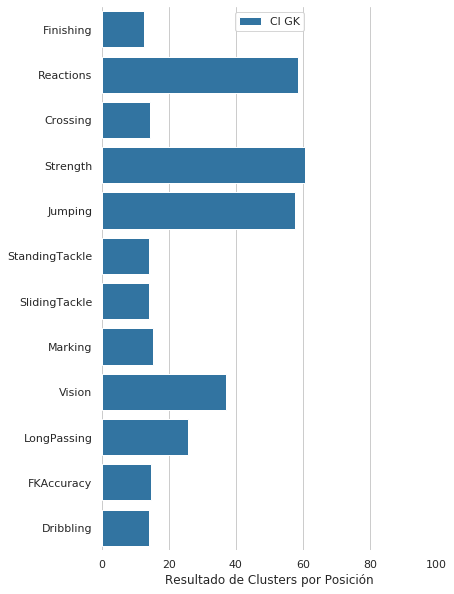

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#Inicializar matplotlib
f, ax = plt.subplots(figsize=(6, 10))

sns.barplot(x="C0", y="Habilidad", data=DFCentroidesConv,
            label="Cl GK", color="#1f77b4")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper center", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)

### 3.5 CENTROIDE VOL

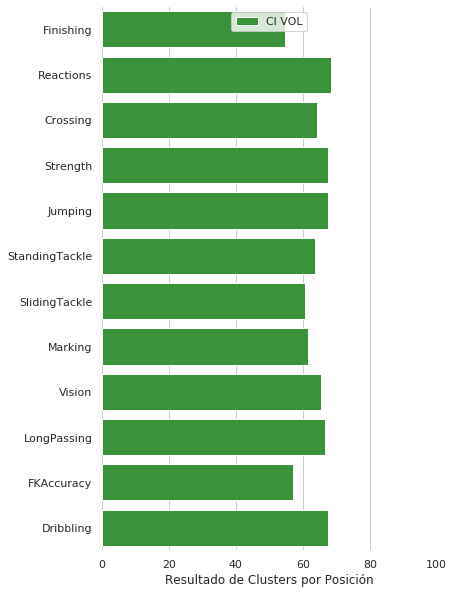

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#Inicializar matplotlib
f, ax = plt.subplots(figsize=(6, 10))

sns.barplot(x="C1", y="Habilidad", data=DFCentroidesConv,
            label="Cl VOL", color="#2ca02c")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper center", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)

### 3.6 CENTROIDE DEF

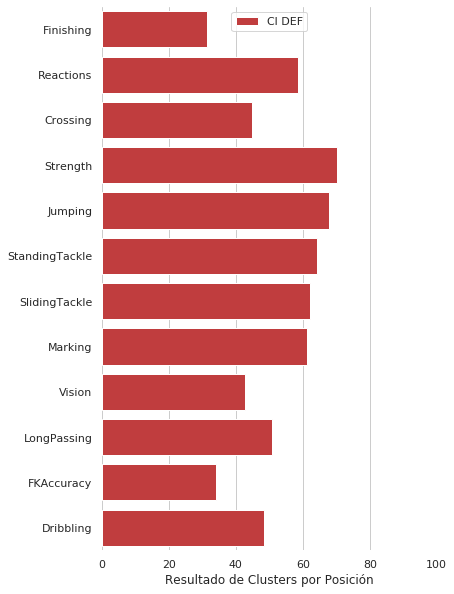

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#Inicializar matplotlib
f, ax = plt.subplots(figsize=(6, 10))

sns.barplot(x="C2", y="Habilidad", data=DFCentroidesConv,
            label="Cl DEF", color="#d62728")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper center", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)

### 3.7 CENTROIDE ATK

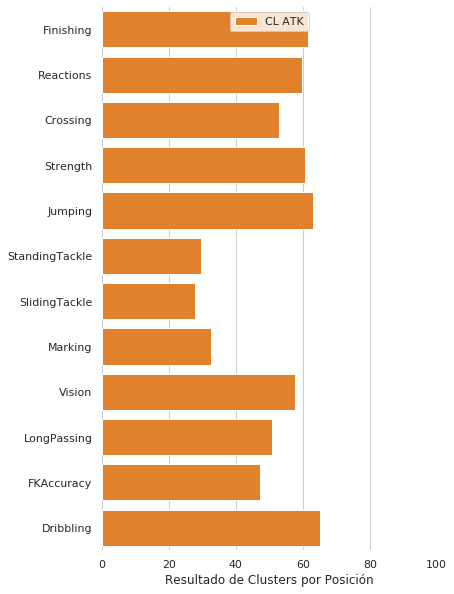

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#Inicializar matplotlib
f, ax = plt.subplots(figsize=(6, 10))

sns.barplot(x="C3", y="Habilidad", data=DFCentroidesConv,
            label="CL ATK", color="#ff7f0e")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper center", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)

## 4. ANALISIS DE CLUSTERS VS ETIQUETAS DE POSICIÓN

### 4.2 DESARROLLO DE TABLA RESUMEN

In [0]:
DFcluster=pd.DataFrame({'Posicion' : DFInfo["Position"], 'Cluster' : clusters})
DFcluster

,Posicion,Cluster
0,RF,0
1,ST,0
2,LW,0
3,GK,1
4,RCM,0
...,...,...
17885,CM,2
17886,ST,1
17887,ST,1
17888,RW,3


In [0]:
DFcluster_Doom = pd.concat([DFcluster['Posicion'], pd.get_dummies(DFcluster['Cluster'])],axis=1) 

In [0]:
DFcluster_Doom

,Posicion,0,1,2,3
0,RF,1,0,0,0
1,ST,1,0,0,0
2,LW,1,0,0,0
3,GK,0,1,0,0
4,RCM,1,0,0,0
...,...,...,...,...,...
17885,CM,0,0,1,0
17886,ST,0,1,0,0
17887,ST,0,1,0,0
17888,RW,0,0,0,1


In [0]:
DFcluster_Doom = DFcluster_Doom.rename(columns={0: 'Cl 0', 1: 'Cl 1',2: 'Cl 2',3: 'Cl 3'})
DFcluster_Doom.head(20)

,Posicion,Cl 0,Cl 1,Cl 2,Cl 3
0,RF,1,0,0,0
1,ST,1,0,0,0
2,LW,1,0,0,0
3,GK,0,1,0,0
4,RCM,1,0,0,0
5,LF,1,0,0,0
6,RCM,1,0,0,0
7,RS,1,0,0,0
8,RCB,1,0,0,0
9,GK,0,1,0,0


In [0]:
DFcluster_Doom0 = DFcluster_Doom.groupby('Posicion')['Cl 0'].sum().to_frame().reset_index()
DFcluster_Doom1 = DFcluster_Doom.groupby('Posicion')['Cl 1'].sum().to_frame().reset_index()
DFcluster_Doom2 = DFcluster_Doom.groupby('Posicion')['Cl 2'].sum().to_frame().reset_index()
DFcluster_Doom3 = DFcluster_Doom.groupby('Posicion')['Cl 3'].sum().to_frame().reset_index()

In [0]:
DFcluster_Doom3

,Posicion,Cl 3
0,CAM,603.0
1,CB,1.0
2,CDM,7.0
3,CF,62.0
4,CM,265.0
5,GK,1.0
6,LAM,15.0
7,LB,7.0
8,LCB,0.0
9,LCM,50.0


In [0]:
DFcluster_Resumen = pd.DataFrame({'Posicion' : DFcluster_Doom0["Posicion"],'CL 0' : DFcluster_Doom1["Cl 1"],'Cl 1' :DFcluster_Doom0["Cl 0"],'Cl 2' : DFcluster_Doom2["Cl 2"],'Cl 3' : DFcluster_Doom3["Cl 3"]})
DFcluster_Resumen


,Posicion,CL 0,Cl 1,Cl 2,Cl 3
0,CAM,0.0,338.0,7.0,603.0
1,CB,1.0,165.0,1584.0,1.0
2,CDM,0.0,548.0,379.0,7.0
3,CF,0.0,12.0,0.0,62.0
4,CM,0.0,820.0,287.0,265.0
5,GK,1988.0,0.0,0.0,1.0
6,LAM,0.0,6.0,0.0,15.0
7,LB,0.0,635.0,661.0,7.0
8,LCB,0.0,117.0,519.0,0.0
9,LCM,0.0,302.0,36.0,50.0


## 4.2 TABLA RESUMEN DE RESULTADOS CLUSTER VS POSICIÓN 

In [0]:
#kkk = DFcluster_Resumen["CL 0"]+DFcluster_Resumen["CL 1"]
DFcluster_Resumen["ACUM A CL VOL"]= DFcluster_Resumen.iloc[:, 1:3].sum(axis=1)
DFcluster_Resumen["ACUM A CL DEF"]= DFcluster_Resumen.iloc[:, 1:4].sum(axis=1)
DFcluster_Resumen["ACUM A CL ATK"]= DFcluster_Resumen.iloc[:, 1:5].sum(axis=1)
DFcluster_Resumen
DFcluster_Resumen.columns = ['Posicion','CL GK','CL VOL','CL DEF','CL ATK','ACUM A CL VOL','ACUM A CL DEF','ACUM A CL ATK']

DFcluster_Resumen["% CL GK"] = DFcluster_Resumen.iloc[:, 1]/DFcluster_Resumen.iloc[:, 7]
DFcluster_Resumen["% CL VOL"] = DFcluster_Resumen.iloc[:, 2]/DFcluster_Resumen.iloc[:, 7]
DFcluster_Resumen["% CL DEF"] = DFcluster_Resumen.iloc[:, 3]/DFcluster_Resumen.iloc[:, 7]
DFcluster_Resumen["% CL ATK"] = DFcluster_Resumen.iloc[:, 4]/DFcluster_Resumen.iloc[:, 7]


DFcluster_Resumen["%A CL GK"] = DFcluster_Resumen.iloc[:, 1]/DFcluster_Resumen.iloc[:, 7]
DFcluster_Resumen["%A CL VOL"] = DFcluster_Resumen.iloc[:, 1]/DFcluster_Resumen.iloc[:, 7] + DFcluster_Resumen.iloc[:, 2]/DFcluster_Resumen.iloc[:, 7]
DFcluster_Resumen["%A CL DEF"] = DFcluster_Resumen.iloc[:, 1]/DFcluster_Resumen.iloc[:, 7] + DFcluster_Resumen.iloc[:, 2]/DFcluster_Resumen.iloc[:, 7]+DFcluster_Resumen.iloc[:, 3]/DFcluster_Resumen.iloc[:, 7]
DFcluster_Resumen["%A CL ATK"] = DFcluster_Resumen.iloc[:, 1]/DFcluster_Resumen.iloc[:, 7] + DFcluster_Resumen.iloc[:, 2]/DFcluster_Resumen.iloc[:, 7]+DFcluster_Resumen.iloc[:, 3]/DFcluster_Resumen.iloc[:, 7]+DFcluster_Resumen.iloc[:, 4]/DFcluster_Resumen.iloc[:, 7]
DFcluster_Resumen["MAX"] = DFcluster_Resumen[["% CL GK", "% CL VOL",'% CL DEF',"% CL ATK"]].max(axis=1)
DFcluster_Resumen=DFcluster_Resumen.sort_values(by=['MAX'], ascending=False)

DFcluster_Resumen

,Posicion,CL GK,CL VOL,CL DEF,CL ATK,ACUM A CL VOL,ACUM A CL DEF,ACUM A CL ATK,% CL GK,% CL VOL,% CL DEF,% CL ATK,%A CL GK,%A CL VOL,%A CL DEF,%A CL ATK,MAX
5,GK,1988.0,0.0,0.0,1.0,1988.0,1988.0,1989.0,0.999497,0.000000,0.000000,0.000503,0.999497,0.999497,0.999497,1.0,0.999497
26,ST,25.0,129.0,7.0,1968.0,154.0,161.0,2129.0,0.011743,0.060592,0.003288,0.924378,0.011743,0.072334,0.075622,1.0,0.924378
1,CB,1.0,165.0,1584.0,1.0,166.0,1750.0,1751.0,0.000571,0.094232,0.904626,0.000571,0.000571,0.094803,0.999429,1.0,0.904626
13,LS,0.0,26.0,0.0,179.0,26.0,26.0,205.0,0.000000,0.126829,0.000000,0.873171,0.000000,0.126829,0.126829,1.0,0.873171
23,RS,0.0,25.0,1.0,174.0,25.0,26.0,200.0,0.000000,0.125000,0.005000,0.870000,0.000000,0.125000,0.130000,1.0,0.870000
3,CF,0.0,12.0,0.0,62.0,12.0,12.0,74.0,0.000000,0.162162,0.000000,0.837838,0.000000,0.162162,0.162162,1.0,0.837838
24,RW,0.0,61.0,1.0,303.0,61.0,62.0,365.0,0.000000,0.167123,0.002740,0.830137,0.000000,0.167123,0.169863,1.0,0.830137
18,RCB,0.0,115.0,535.0,1.0,115.0,650.0,651.0,0.000000,0.176651,0.821813,0.001536,0.000000,0.176651,0.998464,1.0,0.821813
19,RCM,0.0,316.0,38.0,32.0,316.0,354.0,386.0,0.000000,0.818653,0.098446,0.082902,0.000000,0.818653,0.917098,1.0,0.818653
8,LCB,0.0,117.0,519.0,0.0,117.0,636.0,636.0,0.000000,0.183962,0.816038,0.000000,0.000000,0.183962,1.000000,1.0,0.816038


In [0]:
from google.colab import files
DFcluster_Resumen.to_csv('filename.csv') 
files.download('filename.csv')

### 4.3 GRAFICO DE COMPOSICIÓN POSICIÓN VS CLUSTER

4.3.1 GRAFICA GENERAL EN CANTIDAD

Text(0.5, 1.0, 'Cantidad de jugadores en cluster por Posición')

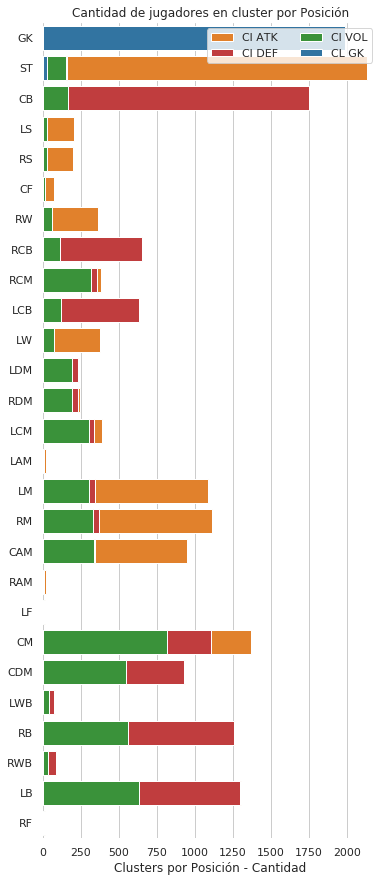

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#Inicializar matplotlib
f, ax = plt.subplots(figsize=(6, 15))

# PLOTEAR

sns.barplot(x="ACUM A CL ATK", y="Posicion", data=DFcluster_Resumen,
            label="Cl ATK", color="#ff7f0e")

sns.barplot(x="ACUM A CL DEF", y="Posicion", data=DFcluster_Resumen,
            label="Cl DEF", color="#d62728")

sns.barplot(x="ACUM A CL VOL", y="Posicion", data=DFcluster_Resumen,
            label="Cl VOL", color="#2ca02c")

sns.barplot(x="CL GK", y="Posicion", data=DFcluster_Resumen,
            label="CL GK", color="#1f77b4")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 2200), ylabel="",
       xlabel="Clusters por Posición - Cantidad")
sns.despine(left=True, bottom=True)
plt.title("Cantidad de jugadores en cluster por Posición")

4.3.2 GRAFICA GENERAL EN PORCENTAJE

Text(0.5, 1.0, 'Porcentaje de jugadores en cluster por Posición')

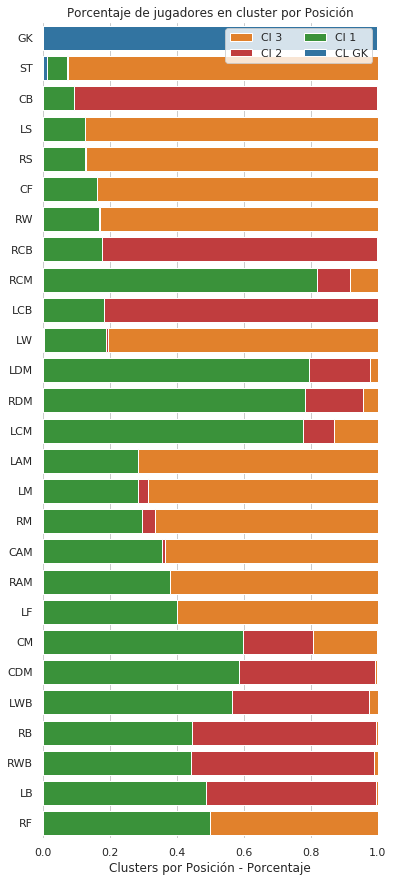

In [0]:
sns.set(style="whitegrid")
#GRAFICAR
f, ax = plt.subplots(figsize=(6, 15))

# PLOTEAR

sns.barplot(x="%A CL ATK", y="Posicion", data=DFcluster_Resumen,
            label="Cl 3", color="#ff7f0e")

sns.barplot(x="%A CL DEF", y="Posicion", data=DFcluster_Resumen,
            label="Cl 2", color="#d62728")

sns.barplot(x="%A CL VOL", y="Posicion", data=DFcluster_Resumen,
            label="Cl 1", color="#2ca02c")

sns.barplot(x="%A CL GK", y="Posicion", data=DFcluster_Resumen,
            label="CL GK", color="#1f77b4")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",xlabel="Clusters por Posición - Porcentaje")
sns.despine(left=True, bottom=True)
plt.title("Porcentaje de jugadores en cluster por Posición")

4.3.3 GRAFICA DEFENSAS EN CANTIDAD

In [0]:
DFcluster_Resumen_DEF = DFcluster_Resumen[DFcluster_Resumen.Posicion.isin(['CB','RCB','LCB'])]
DFcluster_Resumen_DEF = DFcluster_Resumen_DEF.sort_values(by=["CL DEF"], ascending=False)
DFcluster_Resumen_DEF["% Cl DEF"] = DFcluster_Resumen_DEF.iloc[:, 3]/DFcluster_Resumen_DEF.iloc[:, 7]
DFcluster_Resumen_DEF["A% Cl GK"] = DFcluster_Resumen_DEF.iloc[:, 1]/DFcluster_Resumen_DEF.iloc[:, 7]
DFcluster_Resumen_DEF["A% Cl VOL"] = DFcluster_Resumen_DEF.iloc[:, 2]/DFcluster_Resumen_DEF.iloc[:, 7]+DFcluster_Resumen_DEF.iloc[:, 1]/DFcluster_Resumen_DEF.iloc[:, 7]
DFcluster_Resumen_DEF["A% Cl DEF"] = DFcluster_Resumen_DEF.iloc[:, 3]/DFcluster_Resumen_DEF.iloc[:, 7]+DFcluster_Resumen_DEF.iloc[:, 2]/DFcluster_Resumen_DEF.iloc[:, 7]+DFcluster_Resumen_DEF.iloc[:, 1]/DFcluster_Resumen_DEF.iloc[:, 7]
DFcluster_Resumen_DEF["A% Cl ATK"] = DFcluster_Resumen_DEF.iloc[:, 4]/DFcluster_Resumen_DEF.iloc[:, 7]+DFcluster_Resumen_DEF.iloc[:, 3]/DFcluster_Resumen_DEF.iloc[:, 7]+DFcluster_Resumen_DEF.iloc[:, 2]/DFcluster_Resumen_DEF.iloc[:, 7]+DFcluster_Resumen_DEF.iloc[:, 1]/DFcluster_Resumen_DEF.iloc[:, 7]
DFcluster_Resumen_DEF

,Posicion,CL GK,CL VOL,CL DEF,CL ATK,ACUM A CL VOL,ACUM A CL DEF,ACUM A CL ATK,% CL GK,% CL VOL,% CL DEF,% CL ATK,%A CL GK,%A CL VOL,%A CL DEF,%A CL ATK,MAX,% Cl DEF,A% Cl GK,A% Cl VOL,A% Cl DEF,A% Cl ATK
1,CB,1.0,165.0,1584.0,1.0,166.0,1750.0,1751.0,0.000571,0.094232,0.904626,0.000571,0.000571,0.094803,0.999429,1.0,0.904626,0.904626,0.000571,0.094803,0.999429,1.0
18,RCB,0.0,115.0,535.0,1.0,115.0,650.0,651.0,0.000000,0.176651,0.821813,0.001536,0.000000,0.176651,0.998464,1.0,0.821813,0.821813,0.000000,0.176651,0.998464,1.0
8,LCB,0.0,117.0,519.0,0.0,117.0,636.0,636.0,0.000000,0.183962,0.816038,0.000000,0.000000,0.183962,1.000000,1.0,0.816038,0.816038,0.000000,0.183962,1.000000,1.0


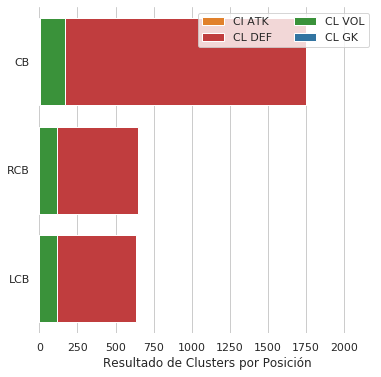

In [0]:
sns.set(style="whitegrid")
#GRAFICAR
f, ax = plt.subplots(figsize=(6, 6))

# PLOTEAR

sns.barplot(x="ACUM A CL ATK", y="Posicion", data=DFcluster_Resumen_DEF,
            label="Cl ATK", color="#ff7f0e")

sns.barplot(x="ACUM A CL DEF", y="Posicion", data=DFcluster_Resumen_DEF,
            label="CL DEF", color="#d62728")

sns.barplot(x="ACUM A CL VOL", y="Posicion", data=DFcluster_Resumen_DEF,
            label="CL VOL", color="#2ca02c")

sns.barplot(x="CL GK", y="Posicion", data=DFcluster_Resumen_DEF,
            label="CL GK", color="#1f77b4")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 2200), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)

4.3.4 GRAFICA DEFENSAS EN PORCENTAJE

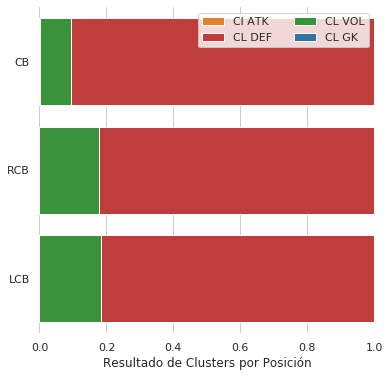

In [0]:
sns.set(style="whitegrid")
#GRAFICAR
f, ax = plt.subplots(figsize=(6, 6))

# PLOTEAR

sns.barplot(x="A% Cl ATK", y="Posicion", data=DFcluster_Resumen_DEF,
            label="Cl ATK", color="#ff7f0e")

sns.barplot(x="A% Cl DEF", y="Posicion", data=DFcluster_Resumen_DEF,
            label="CL DEF", color="#d62728")

sns.barplot(x="A% Cl VOL", y="Posicion", data=DFcluster_Resumen_DEF,
            label="CL VOL", color="#2ca02c")

sns.barplot(x="A% Cl GK", y="Posicion", data=DFcluster_Resumen_DEF,
            label="CL GK", color="#1f77b4")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)

4.3.5 GRAFICA VOLANTES EN CANTIDAD

In [0]:
DFcluster_Resumen_VOL = DFcluster_Resumen[DFcluster_Resumen.Posicion.isin(['LDM','RDM','RCM','LCM'])]
DFcluster_Resumen_VOL = DFcluster_Resumen_VOL.sort_values(by=["CL VOL"], ascending=False)
DFcluster_Resumen_VOL["% CL VOL"] = DFcluster_Resumen_VOL.iloc[:, 2]/DFcluster_Resumen_VOL.iloc[:, 7]
DFcluster_Resumen_VOL["%A CL GK"] = DFcluster_Resumen_VOL.iloc[:, 1]/DFcluster_Resumen_VOL.iloc[:, 7]
DFcluster_Resumen_VOL["%A CL VOL"] = DFcluster_Resumen_VOL.iloc[:, 2]/DFcluster_Resumen_VOL.iloc[:, 7]+DFcluster_Resumen_VOL.iloc[:, 1]/DFcluster_Resumen_VOL.iloc[:, 7]
DFcluster_Resumen_VOL["%A CL DEF"] = DFcluster_Resumen_VOL.iloc[:, 3]/DFcluster_Resumen_VOL.iloc[:, 7]+DFcluster_Resumen_VOL.iloc[:, 2]/DFcluster_Resumen_VOL.iloc[:, 7]+DFcluster_Resumen_VOL.iloc[:, 1]/DFcluster_Resumen_VOL.iloc[:, 7]
DFcluster_Resumen_VOL["%A CL ATK"] = DFcluster_Resumen_VOL.iloc[:, 4]/DFcluster_Resumen_VOL.iloc[:, 7]+DFcluster_Resumen_VOL.iloc[:, 3]/DFcluster_Resumen_VOL.iloc[:, 7]+DFcluster_Resumen_VOL.iloc[:, 2]/DFcluster_Resumen_VOL.iloc[:, 7]+DFcluster_Resumen_VOL.iloc[:, 1]/DFcluster_Resumen_VOL.iloc[:, 7]
DFcluster_Resumen_VOL

,Posicion,CL GK,CL VOL,CL DEF,CL ATK,ACUM A CL VOL,ACUM A CL DEF,ACUM A CL ATK,% CL GK,% CL VOL,% CL DEF,% CL ATK,%A CL GK,%A CL VOL,%A CL DEF,%A CL ATK,MAX
19,RCM,0.0,316.0,38.0,32.0,316.0,354.0,386.0,0.0,0.818653,0.098446,0.082902,0.0,0.818653,0.917098,1.0,0.818653
9,LCM,0.0,302.0,36.0,50.0,302.0,338.0,388.0,0.0,0.778351,0.092784,0.128866,0.0,0.778351,0.871134,1.0,0.778351
20,RDM,0.0,193.0,42.0,11.0,193.0,235.0,246.0,0.0,0.784553,0.170732,0.044715,0.0,0.784553,0.955285,1.0,0.784553
10,LDM,0.0,190.0,44.0,5.0,190.0,234.0,239.0,0.0,0.794979,0.184100,0.020921,0.0,0.794979,0.979079,1.0,0.794979


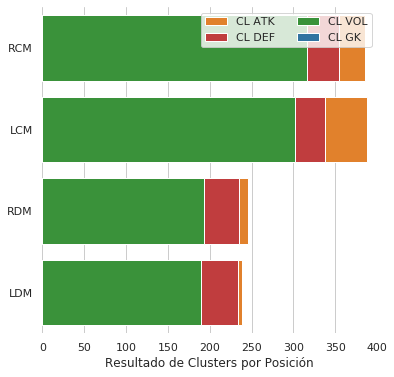

In [0]:
sns.set(style="whitegrid")
#GRAFICAR
f, ax = plt.subplots(figsize=(6, 6))

# PLOTEAR

sns.barplot(x="ACUM A CL ATK", y="Posicion", data=DFcluster_Resumen_VOL,
            label="CL ATK", color="#ff7f0e")

sns.barplot(x="ACUM A CL DEF", y="Posicion", data=DFcluster_Resumen_VOL,
            label="CL DEF", color="#d62728")

sns.barplot(x="ACUM A CL VOL", y="Posicion", data=DFcluster_Resumen_VOL,
            label="CL VOL", color="#2ca02c")

sns.barplot(x="CL GK", y="Posicion", data=DFcluster_Resumen_VOL,
            label="CL GK", color="#1f77b4")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 400), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)

4.3.6 GRAFICA VOLANTES EN PORCENTAJE

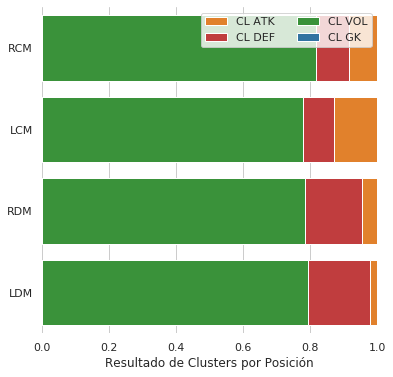

In [0]:
sns.set(style="whitegrid")
#GRAFICAR
f, ax = plt.subplots(figsize=(6, 6))

# PLOTEAR

sns.barplot(x="%A CL ATK", y="Posicion", data=DFcluster_Resumen_VOL,
            label="CL ATK", color="#ff7f0e")

sns.barplot(x="%A CL DEF", y="Posicion", data=DFcluster_Resumen_VOL,
            label="CL DEF", color="#d62728")

sns.barplot(x="%A CL VOL", y="Posicion", data=DFcluster_Resumen_VOL,
            label="CL VOL", color="#2ca02c")

sns.barplot(x="%A CL GK", y="Posicion", data=DFcluster_Resumen_VOL,
            label="CL GK", color="#1f77b4")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)

4.3.7 GRAFICA ATACANTES EN CANTIDAD

In [0]:
DFcluster_Resumen_OFN = DFcluster_Resumen[DFcluster_Resumen.Posicion.isin(['RM','LM','RS','ST','LS','CF','LW','RW','CAM'])]
DFcluster_Resumen_OFN = DFcluster_Resumen_OFN.sort_values(by=["CL ATK"], ascending=False)
DFcluster_Resumen_OFN["% CL ATK"] = DFcluster_Resumen_OFN.iloc[:, 4]/DFcluster_Resumen_OFN.iloc[:, 7]
DFcluster_Resumen_OFN["%A CL GK"] = DFcluster_Resumen_OFN.iloc[:, 1]/DFcluster_Resumen_OFN.iloc[:, 7]
DFcluster_Resumen_OFN["%A CL VOL"] = DFcluster_Resumen_OFN.iloc[:, 2]/DFcluster_Resumen_OFN.iloc[:, 7]+DFcluster_Resumen_OFN.iloc[:, 1]/DFcluster_Resumen_OFN.iloc[:, 7]
DFcluster_Resumen_OFN["%A CL DEF"] = DFcluster_Resumen_OFN.iloc[:, 3]/DFcluster_Resumen_OFN.iloc[:, 7]+DFcluster_Resumen_OFN.iloc[:, 2]/DFcluster_Resumen_OFN.iloc[:, 7]+DFcluster_Resumen_OFN.iloc[:, 1]/DFcluster_Resumen_OFN.iloc[:, 7]
DFcluster_Resumen_OFN["%A CL ATK"] = DFcluster_Resumen_OFN.iloc[:, 4]/DFcluster_Resumen_OFN.iloc[:, 7]+DFcluster_Resumen_OFN.iloc[:, 3]/DFcluster_Resumen_OFN.iloc[:, 7]+DFcluster_Resumen_OFN.iloc[:, 2]/DFcluster_Resumen_OFN.iloc[:, 7]+DFcluster_Resumen_OFN.iloc[:, 1]/DFcluster_Resumen_OFN.iloc[:, 7]
DFcluster_Resumen_OFN

,Posicion,CL GK,CL VOL,CL DEF,CL ATK,ACUM A CL VOL,ACUM A CL DEF,ACUM A CL ATK,% CL GK,% CL VOL,% CL DEF,% CL ATK,%A CL GK,%A CL VOL,%A CL DEF,%A CL ATK,MAX
26,ST,25.0,129.0,7.0,1968.0,154.0,161.0,2129.0,0.011743,0.060592,0.003288,0.924378,0.011743,0.072334,0.075622,1.0,0.924378
12,LM,0.0,307.0,34.0,743.0,307.0,341.0,1084.0,0.000000,0.283210,0.031365,0.685424,0.000000,0.283210,0.314576,1.0,0.685424
22,RM,0.0,330.0,42.0,741.0,330.0,372.0,1113.0,0.000000,0.296496,0.037736,0.665768,0.000000,0.296496,0.334232,1.0,0.665768
0,CAM,0.0,338.0,7.0,603.0,338.0,345.0,948.0,0.000000,0.356540,0.007384,0.636076,0.000000,0.356540,0.363924,1.0,0.636076
24,RW,0.0,61.0,1.0,303.0,61.0,62.0,365.0,0.000000,0.167123,0.002740,0.830137,0.000000,0.167123,0.169863,1.0,0.830137
14,LW,1.0,70.0,2.0,301.0,71.0,73.0,374.0,0.002674,0.187166,0.005348,0.804813,0.002674,0.189840,0.195187,1.0,0.804813
13,LS,0.0,26.0,0.0,179.0,26.0,26.0,205.0,0.000000,0.126829,0.000000,0.873171,0.000000,0.126829,0.126829,1.0,0.873171
23,RS,0.0,25.0,1.0,174.0,25.0,26.0,200.0,0.000000,0.125000,0.005000,0.870000,0.000000,0.125000,0.130000,1.0,0.870000
3,CF,0.0,12.0,0.0,62.0,12.0,12.0,74.0,0.000000,0.162162,0.000000,0.837838,0.000000,0.162162,0.162162,1.0,0.837838


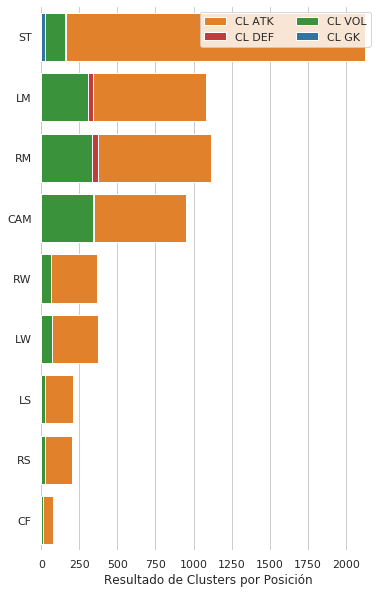

In [0]:
sns.set(style="whitegrid")
#GRAFICAR
f, ax = plt.subplots(figsize=(6, 10))

# PLOTEAR

sns.barplot(x="ACUM A CL ATK", y="Posicion", data=DFcluster_Resumen_OFN,
            label="CL ATK", color="#ff7f0e")

sns.barplot(x="ACUM A CL DEF", y="Posicion", data=DFcluster_Resumen_OFN,
            label="CL DEF", color="#d62728")

sns.barplot(x="ACUM A CL VOL", y="Posicion", data=DFcluster_Resumen_OFN,
            label="CL VOL", color="#2ca02c")

sns.barplot(x="CL GK", y="Posicion", data=DFcluster_Resumen_OFN,
            label="CL GK", color="#1f77b4")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 2200), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)

4.3.8 GRAFICA ATACANTES EN PORCENTAJE

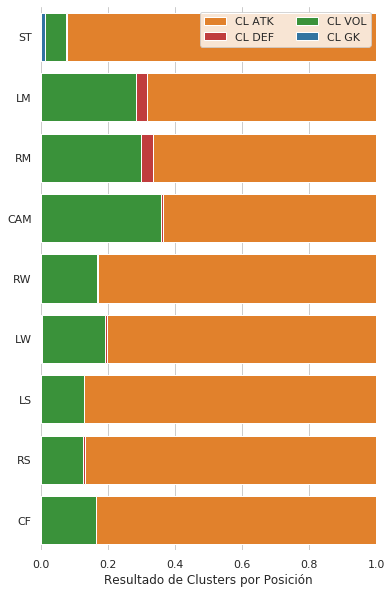

In [0]:
sns.set(style="whitegrid")
#GRAFICAR
f, ax = plt.subplots(figsize=(6, 10))

# PLOTEAR

sns.barplot(x="%A CL ATK", y="Posicion", data=DFcluster_Resumen_OFN,
            label="CL ATK", color="#ff7f0e")

sns.barplot(x="%A CL DEF", y="Posicion", data=DFcluster_Resumen_OFN,
            label="CL DEF", color="#d62728")

sns.barplot(x="%A CL VOL", y="Posicion", data=DFcluster_Resumen_OFN,
            label="CL VOL", color="#2ca02c")

sns.barplot(x="%A CL GK", y="Posicion", data=DFcluster_Resumen_OFN,
            label="CL GK", color="#1f77b4")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)